In [1]:
import numpy as np
from PIL import Image
import math

<b> Assignment 1 : </b> Implement spatial domain filtering for image restoration in presence of noise only
    
    a. All mean filters
    
    b. All order-statistic filters
    
    Compare the results with inbuilt functions if present.
    
    Analyse and comment on the results

<h1> Spatial Domain Filtering </h1>

<h2>1. Mean Filtering </h2>

<h3> 1.1. Artithmetic Mean Filtering </h3>

In [2]:
def am_filter(image, s_x = 7, s_y = 7) :
    img = np.asarray(image) * (1/255)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            x = i + (s_x // 2)
            y = j + (s_y // 2)
            
            acc = 0
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    acc += padded_img[k][l]
            acc /= s_x * s_y
            res[i][j] = acc * 255
    return Image.fromarray(res)

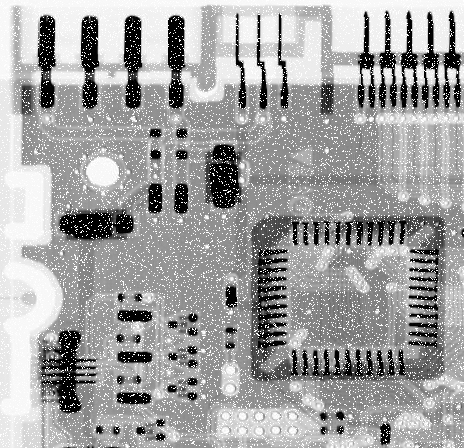

In [3]:
im1 = Image.open("DIP3E_CH05_Original_Images/Fig0508(b)(circuit-board-salt-prob-pt1).tif")
im1

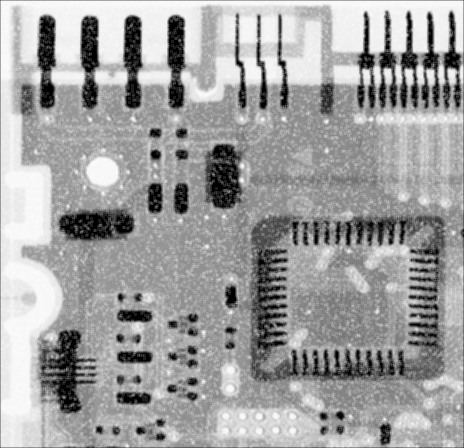

In [4]:
im1r = am_filter(im1, 3, 3)
im1r

<h6> Analysis </h6>

A mean filter smooths the local variation in an image and a result of blurring is that the noise is also reduced.
However, a lot of noise still remains

<h3> 1.2 Geometric Mean Filtering </h3>

In [5]:
def gm_filter(image, s_x = 7, s_y = 7) :
    img = np.asarray(image)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            acc = 0
            flag = 0
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    if padded_img[k][l] != 0 :
                        acc += math.log(padded_img[k][l])
                    else :
                        flag = 1
                        break
                if flag == 1 :
                    break
            if flag == 1 :
                res[i][j] = 0
            else :
                res[i][j] = np.uint8(math.exp(acc * (1 / (s_x * s_y))))
    return Image.fromarray(res)

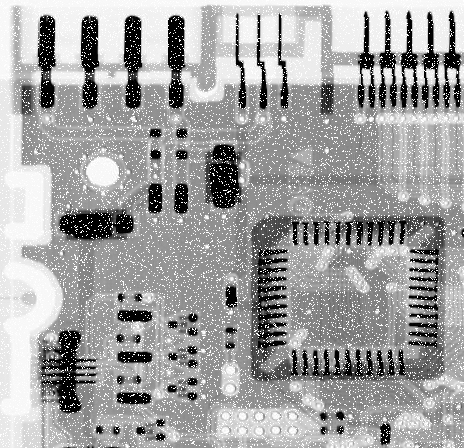

In [6]:
im1 = Image.open("DIP3E_CH05_Original_Images/Fig0508(b)(circuit-board-salt-prob-pt1).tif")
im1

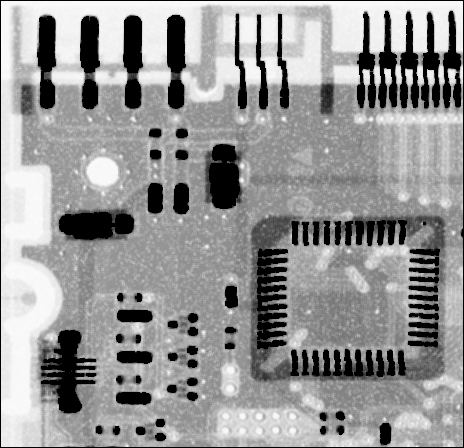

In [7]:
im1r = gm_filter(im1, 3, 3)
im1r

<h6> Analysis </h6>

Geometric mean filter performs well in removing salt noise from images.
It achieves smoothing comparable to the arithmetic mean filter, but it tends to lose less image detail in the process. Lots of dark spots has been surfaced on the image which takes it astray from original.

<h3> 1.3 Harmonic Mean Filtering </h3>

In [8]:
def hm_filter(image, s_x = 7, s_y = 7) :
    img = np.asarray(image)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            x = i + (s_x // 2)
            y = j + (s_y // 2)
            
            acc = 0
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    acc += 1 / padded_img[k][l]
            acc = (s_x * s_y) / (acc)
            res[i][j] = acc
    return Image.fromarray(res)

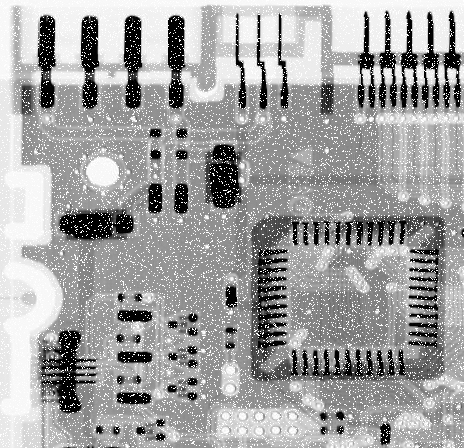

In [9]:
im1 = Image.open("DIP3E_CH05_Original_Images/Fig0508(b)(circuit-board-salt-prob-pt1).tif")
im1

<ipython-input-8-0ff3141cef36>:14: RuntimeWarning: divide by zero encountered in true_divide
  acc += 1 / padded_img[k][l]


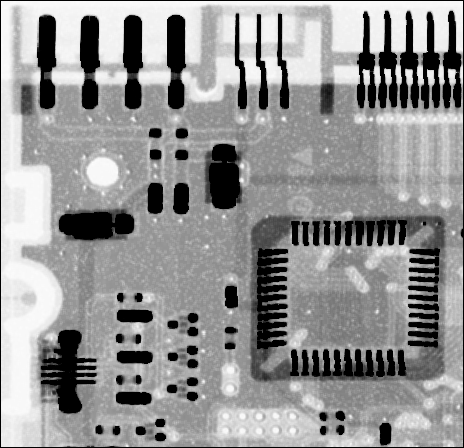

In [10]:
#Obv : It removes salt noise effectively
im1r = hm_filter(im1, 3, 3)
im1r

<h6> Analysis </h6>

Harmonic Filter works well for salt noise, but fails for pepper noise. It does well also with other types of noise like Gaussian noise. Moreover, the readability is almost at par.

In [11]:
def chm_filter(image, s_x = 7, s_y = 7, q = 4) :
    img = np.asarray(image)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            x = i + (s_x // 2)
            y = j + (s_y // 2)
            
            acc1 = 0
            acc2 = 0
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    if padded_img[k][l] != 0 :
                        acc1 += float(padded_img[k][l]) ** (q + 1)
                        acc2 += float(padded_img[k][l]) ** (q)
                    else :
                        acc1 = 0
                        acc2 = 0
            if acc2 == 0 :
                acc = 255
            else :
                acc = acc1 / acc2
            res[i][j] = acc
    return Image.fromarray(res)

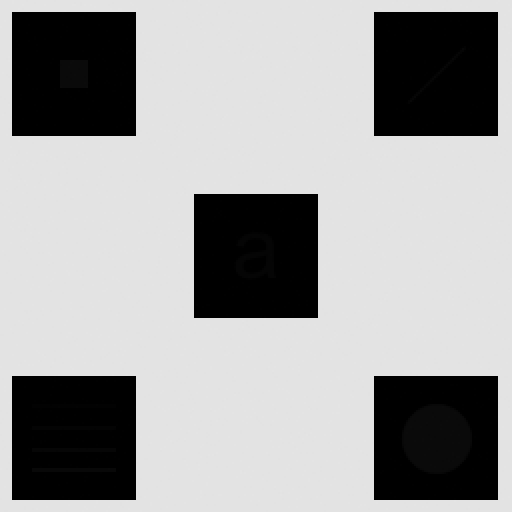

In [12]:
im1 = Image.open("DIP3E_Original_Images_CH03/Fig0326(a)(embedded_square_noisy_512).tif")
im1

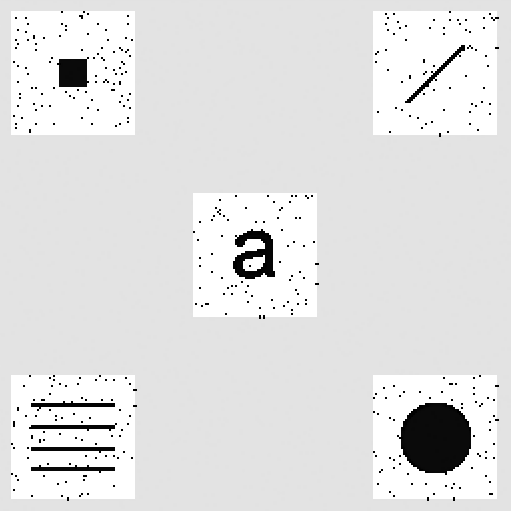

In [13]:
im1r = chm_filter(im1, 3, 3, -2)
im1r

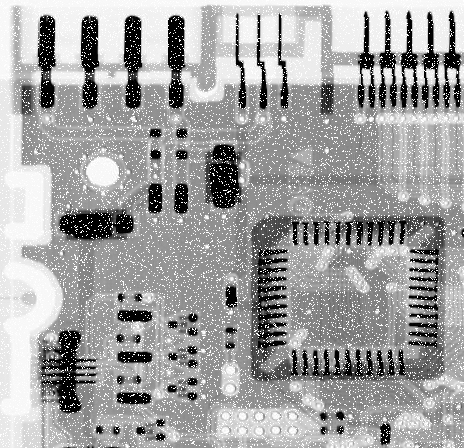

In [14]:
im2 = Image.open("DIP3E_CH05_Original_Images/Fig0508(b)(circuit-board-salt-prob-pt1).tif")
im2

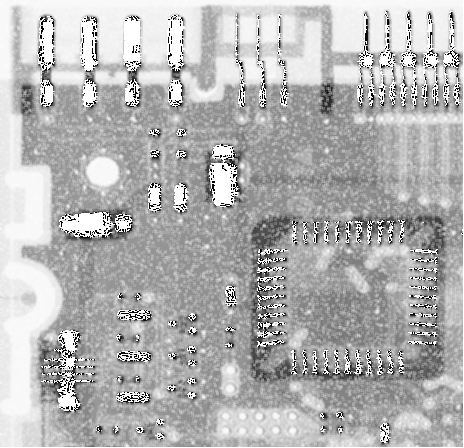

In [15]:
im2r = chm_filter(im2, 3, 3, 0.5)
im2r

<h6> Analysis </h6>

Contra Harmonic Filter works well to bring out hidden patterns in the first image. However, it fails to perform well in removing salt noise when compared to other mean filters.

<h2> 2. Order Statistic Filetring </h2>

<h3> 2.1. Median Filtering </h3>

In [16]:
def median_filter(image, s_x = 7, s_y = 7) :
    img = np.asarray(image)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            x = i + (s_x // 2)
            y = j + (s_y // 2)
            
            acc = []
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    acc.append(padded_img[k][l])
            acc.sort()
            res[i][j] = acc[len(acc) // 2]
    return Image.fromarray(res)

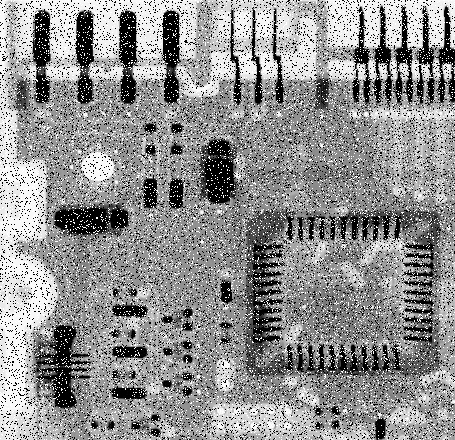

In [17]:
im1 = Image.open("DIP3E_Original_Images_CH03/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif")
im1

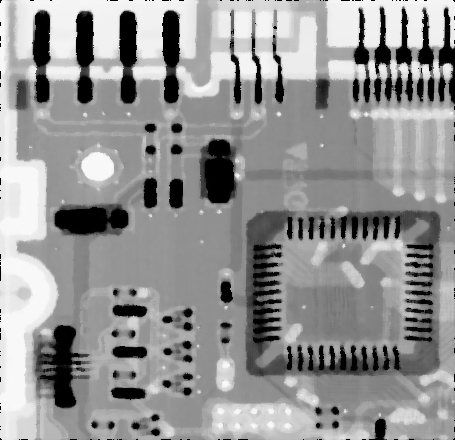

In [18]:
im1r = median_filter(im1, 5, 5)
im1r

<h6> Analysis </h6>

Median filters are effective in presence of both bipolar and unipolar noise. It brings out a very clear image by removing the salt and pepper noise from the image. It's performance on the image was better than all mean filters.

<h3> 2.2. Max Filtering </h3>

In [19]:
def max_filter(image, s_x = 7, s_y = 7) :
    img = np.asarray(image)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            x = i + (s_x // 2)
            y = j + (s_y // 2)
            
            acc = []
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    acc.append(padded_img[k][l])
            acc.sort()
            res[i][j] = acc[len(acc) - 1]
    return Image.fromarray(res)

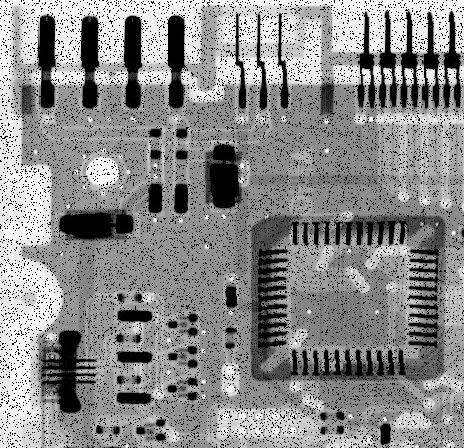

In [20]:
im1 = Image.open("DIP3E_CH05_Original_Images/Fig0508(a)(circuit-board-pepper-prob-pt1).tif")
im1

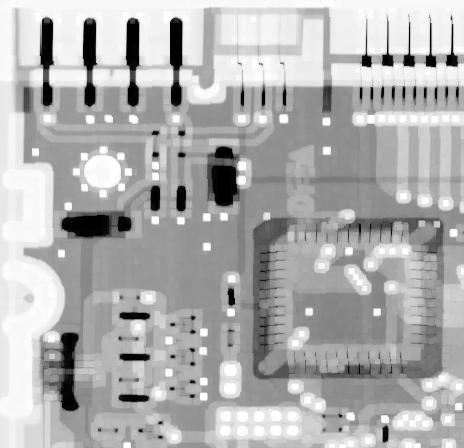

In [21]:
im1r = max_filter(im1, 5, 5)
im1r

<h6> Analysis </h6> 

Max filter does a good job removing pepper noise. Since it always selects the largest pixel value, it's net effect is to brighten the image. However, the filtered image seems blurred and loses detail. The border also vanishes.

<h3> 2.3. Min Filtering </h3>

In [22]:
def min_filter(image, s_x = 7, s_y = 7) :
    img = np.asarray(image)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            x = i + (s_x // 2)
            y = j + (s_y // 2)
            
            acc = []
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    acc.append(padded_img[k][l])
            acc.sort()
            res[i][j] = acc[0]
    return Image.fromarray(res)

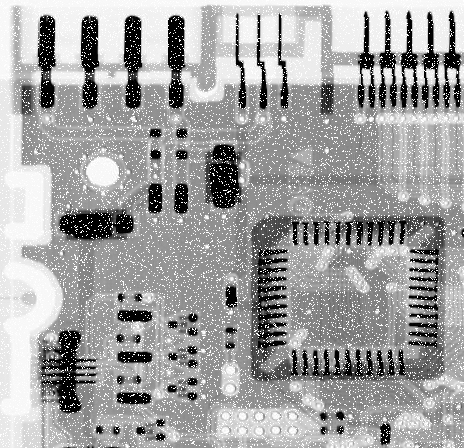

In [23]:
im1 = Image.open("DIP3E_CH05_Original_Images/Fig0508(b)(circuit-board-salt-prob-pt1).tif")
im1

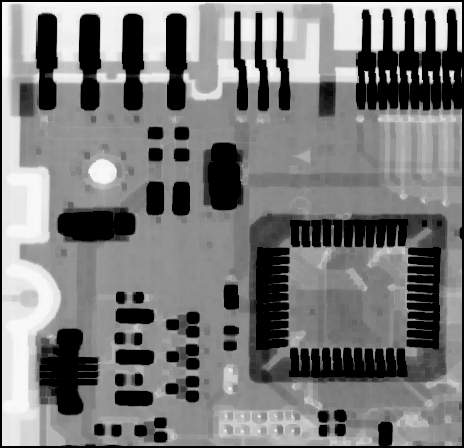

In [24]:
#Obv : It removes salt noise nicely
im1r = min_filter(im1, 5, 5)
im1r

<h6> Analysis </h6> 

Min filter does a good job removing salt noise. Since it chooses the smallest pixel, it has a net darkening effect. A dark border is also formed around the image. The borders of objects in the image also get thicker.

<h3> 2.4. Midpoint Filtering </h3>

In [25]:
def midpoint_filter(image, s_x = 7, s_y = 7) :
    img = np.asarray(image)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            x = i + (s_x // 2)
            y = j + (s_y // 2)
            
            acc = []
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    acc.append(padded_img[k][l])
            acc.sort()
            res[i][j] = 0.5 * (acc[0] + acc[len(acc) - 1])
    return Image.fromarray(res)

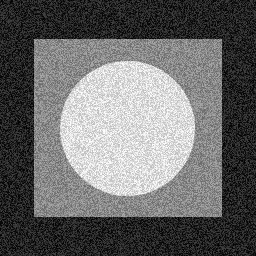

In [26]:
im1 = Image.open("DIP3E_CH05_Original_Images/Fig0504(h)(uniform-noise).tif")
im1

<ipython-input-25-383414f9c732>:16: RuntimeWarning: overflow encountered in ubyte_scalars
  res[i][j] = 0.5 * (acc[0] + acc[len(acc) - 1])


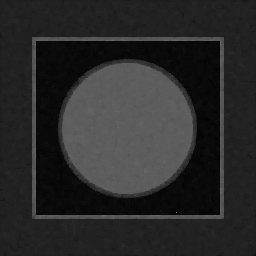

In [27]:
im1r = midpoint_filter(im1, 5, 5)
im1r

<h3> 2.5. Alpha Trimmed Mean Filter </h3>

In [28]:
def atm_filter(image, s_x = 7, s_y = 7, d = 1) :
    img = np.asarray(image)
    size = max(s_x, s_y)
    res = np.zeros(img.shape, dtype = np.uint8)
    padded_img = np.pad(img, size // 2)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            x = i + (s_x // 2)
            y = j + (s_y // 2)
            
            acc = []
            for k in range(i, i + s_x) :
                for l in range(j, j + s_y) :
                    acc.append(padded_img[k][l])
            acc.sort()
            res[i][j] = (1 / (s_x * s_y - d)) * np.sum(acc[(d // 2) : (len(acc) - d // 2)])
    return Image.fromarray(res)

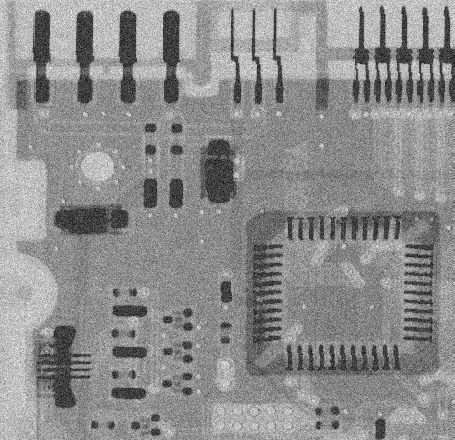

In [29]:
img1 = Image.open("DIP3E_CH05_Original_Images/Fig0513(a)(ckt_gaussian_var_1000_mean_0).tif")
img1

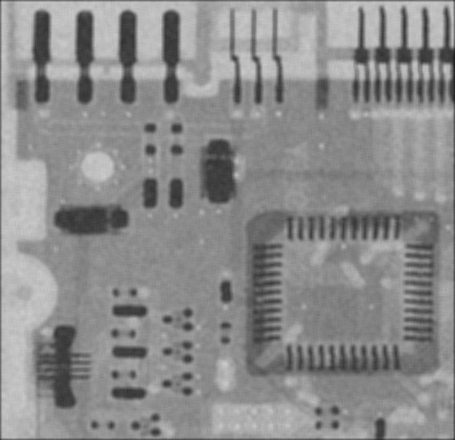

In [30]:
#Obv : It effectively removes gaussian noise with salt and pepper noise
img1r = atm_filter(img1, 5, 5, 2)
img1r

<h6> Analysis </h6>

Alpha Trimmer filter is useful for reducing multiple types of noise such as a combination of Salt pepper noise and Gaussian noise. Output seems to be much dampened when compared with input image, noise has been removed as, too low and high frequency components are slashed off.